In [39]:
from os.path import join as jn
import shelve

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ROOT = jn("..", "..", "..", "")
DATA = jn(ROOT, "results", "dataframes", "")
FIGURES = jn(ROOT, "results", "figures", "")

# Preprocessing

In [40]:
df = pd.read_csv(jn(DATA, "dataframe_ex-mu-gamma.csv"))
df.head()

,system,theta,embedding,mu,t1,t2,prob,accuracy,auroc,pr,intercept,coef_distances,coef_degrees
0,LFR,0.3,HOPE,0.1,2.1,1.0,1,0.810269,0.895267,0.894874,-0.037777,-8.082335,-6.566838
1,LFR,0.3,HOPE,0.2,2.1,1.0,1,0.795210,0.878915,0.879812,-0.038032,-8.211916,-7.111643
2,LFR,0.3,HOPE,0.3,2.1,1.0,1,0.791748,0.874738,0.874473,-0.034311,-10.068411,-7.155929
3,LFR,0.3,HOPE,0.4,2.1,1.0,1,0.774021,0.854509,0.850201,-0.022931,-10.371669,-7.525047
4,LFR,0.3,HOPE,0.5,2.1,1.0,1,0.750977,0.824594,0.816801,0.042452,-11.433698,-7.296112


In [41]:
df = df.query("embedding == 'N2V'")
df = df.query("t1 < 4.0")
df = df.drop(columns=['system', 'theta', 'embedding', 't2', 'prob'])

In [42]:
df["relative_impact"] = np.abs(df["coef_distances"]) / (np.abs(df["coef_degrees"]) + np.abs(df["coef_distances"]))

# Visualizations

In [43]:
df_ = df.pivot_table(index='mu', columns='t1', values='auroc').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'N2V at $\\theta=0.3$')]

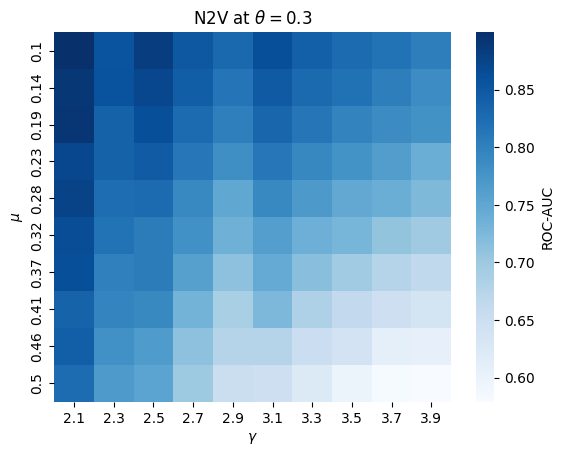

In [44]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Blues",
    cbar_kws = {"label": "ROC-AUC"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="N2V at "+r"$\theta=0.3$")

In [45]:
df_ = df.pivot_table(index='mu', columns='t1', values='relative_impact').dropna()

[Text(0.5, 23.52222222222222, '$\\gamma$'),
 Text(50.722222222222214, 0.5, '$\\mu$'),
 Text(0.5, 1.0, 'N2V at $\\theta=0.3$')]

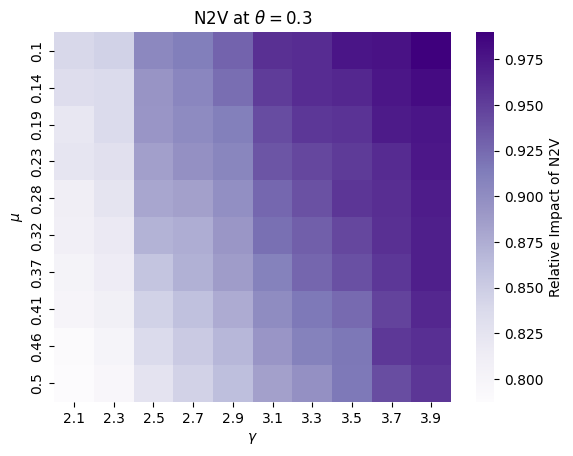

In [46]:
plt.figure()

g = sns.heatmap(
    df_,
    cmap="Purples",
    cbar_kws = {"label": "Relative Impact of N2V"})

g.set(xlabel=r"$\gamma$", ylabel=r"$\mu$", title="N2V at "+r"$\theta=0.3$")